In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('500hits.csv',encoding='latin-1')

In [3]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [4]:
df.drop(['PLAYER','CS'],axis=1,inplace=True)

In [5]:
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


<Axes: >

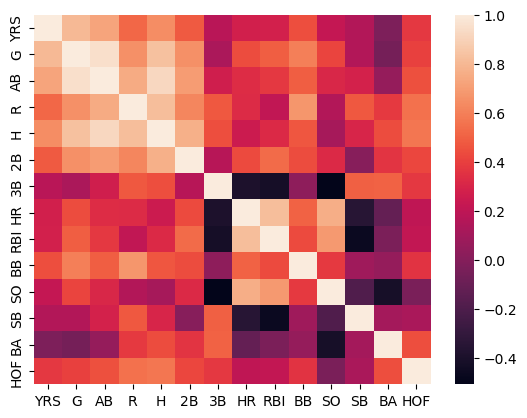

In [6]:
sns.heatmap(df.corr())

In [7]:
df.dtypes

YRS      int64
G        int64
AB       int64
R        int64
H        int64
2B       int64
3B       int64
HR       int64
RBI      int64
BB       int64
SO       int64
SB       int64
BA     float64
HOF      int64
dtype: object

In [8]:
df['HOF'].value_counts()

HOF
0    313
1    151
2      1
Name: count, dtype: int64

In [9]:
df = df[df['HOF']!=2]

In [10]:
df['HOF'].value_counts()

HOF
0    313
1    151
Name: count, dtype: int64

In [11]:
df_0 = df[df['HOF']==0]
df_1 = df[df['HOF']==1]

In [13]:
df_0 = resample(df_0, replace=False, n_samples=150)
df_1 = resample(df_1, replace=False, n_samples=150)

In [14]:
df_0.shape

(150, 14)

In [15]:
df_1.shape

(150, 14)

In [16]:
df_sample = pd.concat([df_0, df_1])

In [17]:
df_sample.shape

(300, 14)

In [18]:
X = df_sample.iloc[:,:-1]
y = df_sample['HOF']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [23]:
lr = LogisticRegression()

In [54]:
param_grid = [
    {
        'penalty':['l1','l2'],
        'C':np.logspace(-4,2,10),
        'solver':['saga','liblinear'],
        'max_iter':[5000,10000,15000]
    }
]

In [55]:
gcvl = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy', error_score='raise')

In [56]:
gcvl.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score='raise', estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                          'max_iter': [5000, 10000, 15000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'liblinear']}],
             scoring='accuracy')

In [57]:
gcvl.best_params_

{'C': 0.21544346900318823,
 'max_iter': 5000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [58]:
best_log = gcvl.best_estimator_

In [63]:
y_scores = best_log.predict_proba(X_test_scaled)[:,1]

In [64]:
y_scores

array([0.96191108, 0.74088534, 0.30195121, 0.08895478, 0.91703733,
       0.87526416, 0.47816851, 0.10315647, 0.30525292, 0.54952407,
       0.30344984, 0.04550583, 0.48349824, 0.18731362, 0.49029731,
       0.79220995, 0.16751721, 0.57669716, 0.62058656, 0.66291181,
       0.15445903, 0.69651942, 0.99509937, 0.84569949, 0.27027118,
       0.09711369, 0.88618239, 0.99735599, 0.64308255, 0.39721614,
       0.44168495, 0.79005127, 0.60573432, 0.5066898 , 0.98282542,
       0.16459845, 0.13442644, 0.17599816, 0.65623329, 0.06780322,
       0.17676178, 0.10008469, 0.70567025, 0.32866196, 0.08890323,
       0.10874752, 0.95310346, 0.53744117, 0.10977588, 0.66480369,
       0.79533719, 0.04893776, 0.18454097, 0.61534047, 0.71235488,
       0.83121114, 0.60514449, 0.22699459, 0.9995555 , 0.0716941 ])

In [65]:
fpr, tpr, threshold = roc_curve(y_test, y_scores)

In [66]:
optimal_index = np.argmax(tpr-fpr)
optimal_threshold = threshold[optimal_index]
optimal_threshold

0.47816851371223995

### SVM

In [81]:
param_grid = [
    {
        'C':[0.1,0.01,0.4,0.7],
        'kernel':['linear','poly','rbf'],
        'degree':[2,3,4],
        'coef0':[0,0.5,1,10],
        'gamma':['auto','scale',0.1,0.5]
    }
]

In [82]:
gcvs = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=True, error_score='raise')

In [83]:
gcvs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, error_score='raise', estimator=SVC(),
             param_grid=[{'C': [0.1, 0.01, 0.4, 0.7], 'coef0': [0, 0.5, 1, 10],
                          'degree': [2, 3, 4],
                          'gamma': ['auto', 'scale', 0.1, 0.5],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy', verbose=True)

In [84]:
gcvs.best_params_

{'C': 0.7, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [85]:
best_svc = gcvs.best_estimator_

### Decision Tree

In [96]:
param_grid = [
    {
        'max_depth':[5,7,9],
        'min_samples_split':[3,5,7,9],
        'min_samples_leaf':[3,5,7,9],
        'criterion':['gini','entropy'],
        'max_features':['log2','sqrt',None],
        'splitter':['best','random']
    }
]

In [97]:
gcvd = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3 , scoring = 'accuracy', n_jobs=-1, error_score='raise')

In [98]:
gcvd.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 7, 9],
                          'max_features': ['log2', 'sqrt', None],
                          'min_samples_leaf': [3, 5, 7, 9],
                          'min_samples_split': [3, 5, 7, 9],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

In [99]:
gcvd.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'splitter': 'random'}

In [100]:
best_dtc = gcvd.best_estimator_

In [103]:
path = best_dtc.cost_complexity_pruning_path(X_train, y_train)

In [104]:
ccp_alphas = path.ccp_alphas

In [110]:
train_scores = []
best_params = best_dtc.get_params()
best_params.pop('ccp_alpha')
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(**best_params, ccp_alpha= alpha)
    clf.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))

In [111]:
train_scores

[0.8,
 0.8166666666666667,
 0.8291666666666667,
 0.8083333333333333,
 0.8041666666666667,
 0.7916666666666666,
 0.8125,
 0.8166666666666667,
 0.7958333333333333,
 0.8208333333333333,
 0.7375,
 0.7791666666666667,
 0.7958333333333333,
 0.5041666666666667]

In [114]:
ccp_alpha = ccp_alphas[train_scores.index(np.max(train_scores))]

In [115]:
ccp_alpha

0.00045454545454545747

In [116]:
best_dtc.set_params(ccp_alpha=ccp_alpha)

DecisionTreeClassifier(ccp_alpha=0.00045454545454545747, max_depth=9,
                       min_samples_leaf=9, min_samples_split=7,
                       splitter='random')

### Model comparision

In [117]:
best_model = {
    "LR": best_log,
    "SVC":best_svc,
    "DTC":best_dtc
}

In [122]:
cv_results = {}
for name, model in best_model.items():
    if name in ["LR","SVC"]:
        scores = cross_val_score(model, X_train_scaled, y_train, scoring = 'accuracy')
    else:
        scores = cross_val_score(model, X_train, y_train, scoring='accuracy')
    cv_results[name] = scores.mean()

In [123]:
cv_results

{'LR': 0.825, 'SVC': 0.8125, 'DTC': 0.7833333333333334}

### Applying Logistic Regression

In [128]:
best_model = best_log

In [129]:
y_pred = (best_log.predict_proba(X_test_scaled)[:,1]>=optimal_threshold).astype('int')

In [130]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [131]:
a_score = accuracy_score(y_test, y_pred)
a_score

0.8

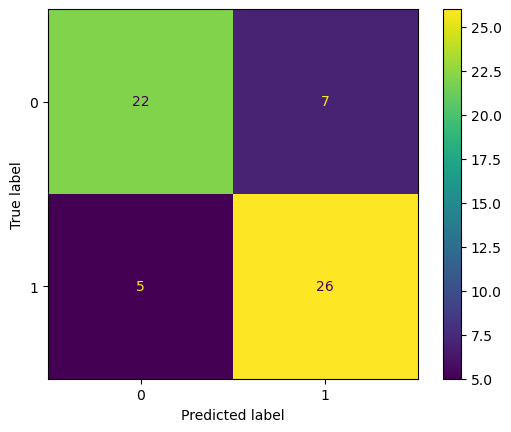

In [132]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [133]:
rc_score = roc_auc_score(y_test, y_scores)
rc_score

0.8898776418242491